In [1]:
import sys
sys.path.append('/media/tidiane/D:/dev/Pasteur/palm_tools/src')


In [6]:
import json
job_folder = "/home/tidiane/dev/pasteur/tracktor/data/jobs/90"
with open(os.path.join(job_folder,"mmd_by_group_dict.json"), 'r') as f:
    mmd_by_group_dict = json.load(f)

In [7]:
mmd_by_group_dict.keys()

dict_keys(['factors_list', 'comparisons', 'p_val', 'witness_function_dict'])

In [8]:
mmd_by_group_dict["witness_function_dict"].keys()

dict_keys(["{'arbitrary_condition': 'A'} {'arbitrary_condition': 'B'}", "{'arbitrary_condition': 'A'} {'arbitrary_condition': 'A', 'time': 't1'}", "{'arbitrary_condition': 'A'} {'arbitrary_condition': 'A', 'time': 't2'}"])

In [13]:
str(mmd_by_group_dict["comparisons"][0][0])

"{'arbitrary_condition': 'A'}"

In [3]:
    
import pandas as pd
import os 
file_name = "10fd51e9edc4d570.trxyt"
file_path = "/home/tidiane/dev/pasteur/export_folder/" + file_name

loc_df = pd.read_csv(file_path)
print(loc_df.columns)
#loc_df = loc_df["x","y"]

Index(['Unnamed: 0', 'x', 'y', 'frame', 'sigma', 't', 'n', 'alpha', 'U_1',
       'U_2', 'best_model', 'p_fBM', 'p_LW', 'p_sBM', 'p_OU', 'p_CTRW', 'h_1',
       'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11',
       'h_12', 'h_13', 'h_14', 'h_15', 'h_16'],
      dtype='object')


In [7]:
loc_df[["x","y"]]

x         y
0     4.711511  1.431805
1     4.691197  1.402150
2     4.619679  1.409372
3     4.698065  1.380282
4     4.647999  1.400917
...        ...       ...
7707  4.282385  5.331196
7708  1.804539  4.876316
7709  1.777408  4.931781
7710  1.783511  4.611927
7711  1.744178  4.395175

[7712 rows x 2 columns]

In [2]:
%load_ext autoreload
%autoreload 2
from palm_tools import TrackSets
from palm_tools.analysis import MMDInterUnitAnalysis, MDSAnalysis, MMDInterGroupAnalysis
from palm_tools.processing import Gratin, GratinParameters
from palm_tools.processing.ts_post_processing import PostProcessingStepSeries
import pandas as pd
import numpy as np
from glob import glob
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Source files, they're left untouched, only read
ORIGINAL_TRACKS_FILES = glob("/media/tidiane/D:/dev/Pasteur/data/tracksets/example_files/*.trxyt",recursive=True)
# We copy files in this directory, it's as if they were 'uploaded' there by the user
EXPORT_FOLDER = "/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder"
if not os.path.exists(EXPORT_FOLDER):
    os.mkdir(EXPORT_FOLDER)
TRACKS_FILES = []
for f in ORIGINAL_TRACKS_FILES:
    tf = os.path.join(EXPORT_FOLDER,os.path.split(f)[-1])
    shutil.copy(f,tf)
    TRACKS_FILES.append(tf)

In [4]:
TRACKS_FILES

['/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/02e0de7a4caebc82.trxyt',
 '/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/10fd51e9edc4d570.trxyt',
 '/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/1d372d16b9d77091.trxyt',
 '/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/66e67e9052c35e8d.trxyt']

In [8]:
index_df = pd.DataFrame.from_dict({
    "file":TRACKS_FILES,
    "arbitrary_condition":[
        "A" if np.random.rand() > .5 else "B" for f in TRACKS_FILES
    ]})
index_df.head()

file arbitrary_condition
0  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...                   B
1  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...                   B
2  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...                   A
3  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...                   A

In [9]:
tss = TrackSets.from_files(TRACKS_FILES,root_folder=EXPORT_FOLDER,index_df=index_df)

In [10]:
for ts in tss:
    print(ts)

Set of 693 trajs coming from file /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/02e0de7a4caebc82.trxyt
Set of 595 trajs coming from file /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/10fd51e9edc4d570.trxyt
Set of 1468 trajs coming from file /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/1d372d16b9d77091.trxyt
Set of 2529 trajs coming from file /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/66e67e9052c35e8d.trxyt


In [11]:
tss[0].locs.head()

x         y  frame     sigma     t   n
20  6.567428  4.522452      9  2.358852  0.27  23
22  6.503837  4.570785     10  2.436496  0.30  23
24  6.532896  4.569531     11  2.667854  0.33  23
26  6.584498  4.472216     12  2.494696  0.36  23
27  6.544505  4.398021     13  2.210227  0.39  23

In [12]:
sys.path.append("/media/tidiane/D:/dev/Pasteur/gratin-rotation_invariance/src")

In [13]:
gt = Gratin(params=GratinParameters(model_path="/media/tidiane/D:/dev/Pasteur/models/specht_palm.ckpt",
    umap_path="/media/tidiane/D:/dev/Pasteur/models/umap_specht"))

In [14]:
pps = PostProcessingStepSeries(sets_of_trajs=tss,processing_steps=[gt])

In [15]:
pps.process()

Processing in PPSS :   0%| | 0/4 [00:00<?, ?it/s, /media/tid

f size =  [64, 128, 64, 32]
Convolution has 19296 parameters. Input dim is 32, output is 32
alpha MLP size =  [16, 128, 128, 64, 16, 1]
Alpha predictor has 28675 parameters


/home/tidiane/.conda/envs/Pasteur/lib/python3.9/site-packages/torch_sparse/storage.py:14: UserWarning: `layout` argument unset, using default layout "coo". This may lead to unexpected behaviour.
  warnings.warn('`layout` argument unset, using default layout '
2022-03-31 16:58:52.267112: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-31 16:58:52.269829: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Thu Mar 31 16:58:57 2022 Building and compiling search function


2022-03-31 16:58:59.202401: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-31 16:58:59.209711: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 16:58:59.212271: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tidiane-Latitude-7490): /proc/driver/nvidia/version does not exist
2022-03-31 16:58:59.269246: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Pickle of ParametricUMAP model loaded from /media/tidiane/D:/dev/Pasteur/models/umap_specht/model.pkl


Keras encoder model loaded from /media/tidiane/D:/dev/Pasteur/models/umap_specht/encoder
Keras full model loaded from /media/tidiane/D:/dev/Pasteur/models/umap_specht/parametric_model
1/1 [==============================] - 4s 4s/step


Processing in PPSS :  25%|▎| 1/4 [00:26<01:17, 25.98s/it, /m/home/tidiane/.conda/envs/Pasteur/lib/python3.9/site-packages/torch_sparse/storage.py:14: UserWarning: `layout` argument unset, using default layout "coo". This may lead to unexpected behaviour.
  warnings.warn('`layout` argument unset, using default layout '


1/1 [==============================] - 0s 192ms/step


Processing in PPSS :  50%|▌| 2/4 [00:35<00:32, 16.25s/it, /m/home/tidiane/.conda/envs/Pasteur/lib/python3.9/site-packages/torch_sparse/storage.py:14: UserWarning: `layout` argument unset, using default layout "coo". This may lead to unexpected behaviour.
  warnings.warn('`layout` argument unset, using default layout '


2/2 [==============================] - 0s 13ms/step


Processing in PPSS :  75%|▊| 3/4 [00:38<00:10, 10.31s/it, /m/home/tidiane/.conda/envs/Pasteur/lib/python3.9/site-packages/torch_sparse/storage.py:14: UserWarning: `layout` argument unset, using default layout "coo". This may lead to unexpected behaviour.
  warnings.warn('`layout` argument unset, using default layout '


3/3 [==============================] - 0s 10ms/step


Processing in PPSS : 100%|█| 4/4 [00:43<00:00, 11.00s/it, /m


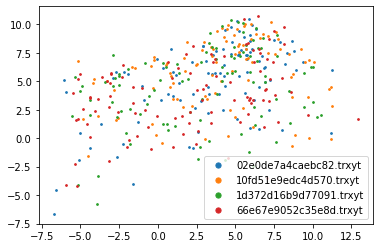

In [16]:
# Visualize latent vectors
for ts in tss:
    U = ts.locs.groupby("n")[["U_1","U_2"]].mean().sample(100).values
    plt.scatter(U[:,0],U[:,1],label=os.path.split(ts.origin_file)[1],s=3)
plt.legend(markerscale=3)

# MMD inter units

In [17]:
RUN_NAME = "example"

def skip_200_first_frames(df):
    return df["frame"] > 200

mmd = MMDInterUnitAnalysis(track_sets=tss,
    filter_func=skip_200_first_frames,
    unit_key=["file"], 
    # it is possible to delimit units by a column of the trajectories files (if they have additional information)
    # or to consider a cartesian product of two columns. 
    # example of valid values : ["file","time_bin"], ["file","organelle"], ["organelle"] (spanned across files)
    use_high_dimension=False,
    n_bootstraps=250,
    n_max_trajs_per_unit=500, # For speed, we never consider more than 500 trajectories per unit
    n_min_trajs_per_unit=150, # For accuracy, we discard units with less than 150 trajectories
    run_name=RUN_NAME)

In [18]:
mmd.process()

In [21]:
mmd._D_bootstrap.shape

(4, 4, 250)

# MDS based on it

In [18]:
mds = MDSAnalysis(track_sets=tss,mmd=mmd,run_name=RUN_NAME)

In [19]:
mds.process()

100%|████████████████████| 10000/10000 [00:03<00:00, 2573.53it/s, loss=3.48e-5]


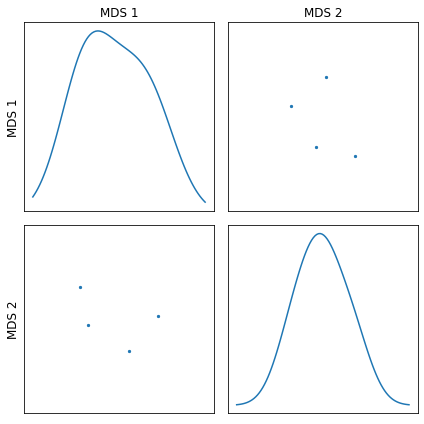

In [20]:
mds.plot_scatter()

# MMD inter groups

In [21]:
mmd = MMDInterGroupAnalysis(track_sets=tss,
    filter_func=skip_200_first_frames,
    unit_key=["file"],
    null_mode="mix",
    group_by_keys=["arbitrary_condition"],
    # it is possible to delimit units by a column of the trajectories files (if they have additional information)
    # or to consider a cartesian product of two columns. 
    # example of valid values : ["file","time_bin"], ["file","organelle"], ["organelle"] (spanned across files)
    use_high_dimension=False,
    n_max_bootstraps=250,
    n_max_trajs_per_unit=500, # For speed, we never consider more than 500 trajectories per unit
    n_min_trajs_per_unit=150, # For accuracy, we discard units with less than 150 trajectories
    run_name=RUN_NAME)

In [22]:
mmd.process()

Adding units from tracksets: 100%|█| 4/4 [00:00<00:00, 33.60it/s, 2501 trajs fr


latent_df has 4 units



  0%|                                                    | 0/1 [00:00<?, ?it/s]

# units 
	 A : 2
	 B : 2
min_n = 591 (591, 685)
# of trajs : 1000 vs 1000



A VS B:  79%|█████████████████████████▏      | 197/250 [00:27<00:05,  9.76it/s]


A VS B: 100%|████████████████████████████████| 250/250 [00:33<00:00,  8.72it/s]
(250 bootstraps) : {'arbitrary_condition': 'A'} VS {'arbitrary_condition': 'B'}


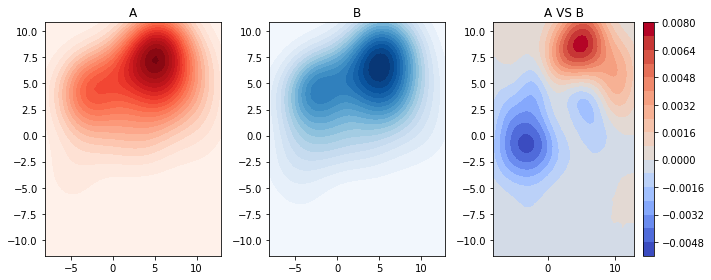

In [23]:
mmd.plot_witness_function({"arbitrary_condition":"A"},{"arbitrary_condition":"B"})

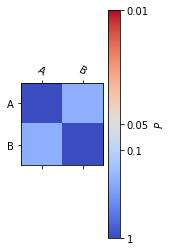

In [24]:
mmd.plot_mosaic()

/media/tidiane/D:/dev/Pasteur/palm_tools/src/palm_tools/analysis/mmd_analysis.py:489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("distance", inplace=True)


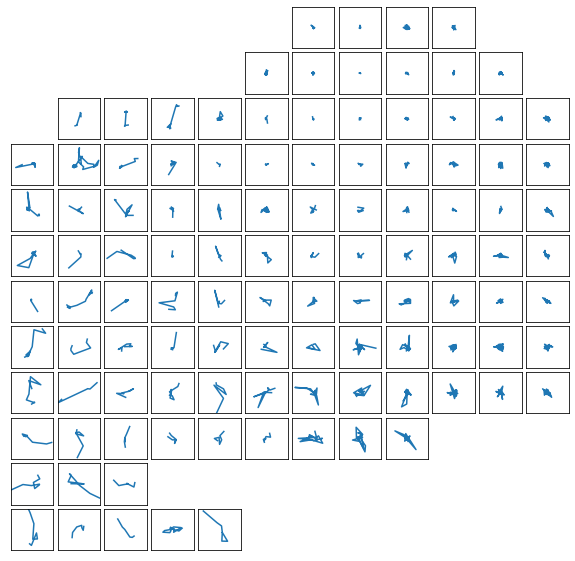

In [25]:
mmd.plot_latent_map()

Limits are calibrated


Interpolations are done
Looking at critical trajectories


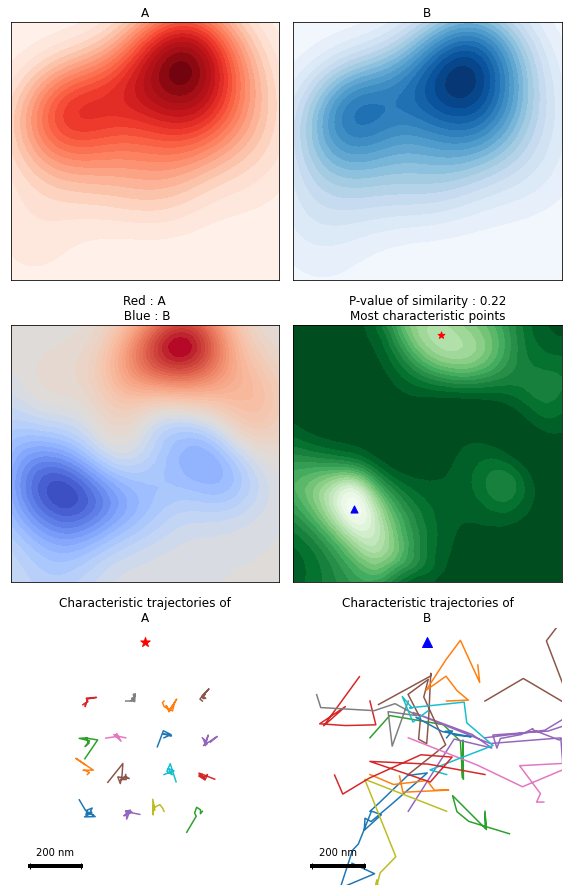

In [26]:
mmd.plot_discriminant_trajs({"arbitrary_condition":"A"},{"arbitrary_condition":"B"})